# Nomogram Shore Protection Manual - SPM 

$$\frac{g\cdot H_{m0}}{U^{2}} = 1.6 \cdot 10^{-3} (\frac{gF}{U^{2}})^{1/2}$$

$$\frac{g\cdot T_{m}}{U^{2}} = 2.857 \cdot 10^{-1} (\frac{gF}{U^{2}})^{1/3}$$

$$\frac{g\cdot H_{m0}}{U^{2}} = 2.433 \cdot 10^{-1}$$

$$\frac{g\cdot T_{m}}{U} = 8.134 $$

In [1]:
# arrays
import numpy as np

# plots
import matplotlib.pyplot as plt

# panel interaction
import panel as pn

pn.extension()


In [2]:
def plot_SPM(H, T, X):
    
    fig = plt.figure(figsize=(15,5))
    plt.plot(X, H, c='slateblue', label='$H_{m0}$ (m)', linewidth=4)
    plt.plot(X, T, c='yellowgreen', label='$T_{m}$(s)', linewidth=4)
    plt.legend()
    plt.xlabel('X Fetch (Km)')
    plt.ylim([0, 15])
    plt.xlim(1, 700)
    plt.close()
    
    return(fig)

In [3]:
def SPM(U, t):
    g, T, H = 9.81, [], []
    F = np.arange(1, 1000, 1)
    for X in F:
        hi = np.min([(1.6*10**(-3))*((g*X*1000/(U**2))**(0.5))*(U**2)*(1/g), 
                    6.710**(-5)*((g*t*3600/U)**(0.75))*(U**2)*(1/g), 
                    (0.2433*(U**2))/g])
        
        ti = np.min([0.2857*((g*X*1000/(U**2))**(0.333))*U/g, 
                    3.44*10**(-2)*((g*t*3600/U)**(0.5))*U/g, 
                    8.134*U/g])
        
        H.append(hi)
        T.append(ti)
    fig = plot_SPM(H, T, F)
    return(fig)
 

In [4]:
kw = dict(
    U=(5, 40, 1, 10), t=(1, 30, 1, 5)
)

In [5]:
i = pn.interact(SPM, **kw)

Column
    [0] Markdown(str)
    [1] Column
        [0] IntSlider(end=40, name='U', start=5, value=10)
        [1] IntSlider(end=30, name='t', start=1, value=5)
    [2] Row
        [0] Row
            [0] Matplotlib(Figure, name='interactive00101')
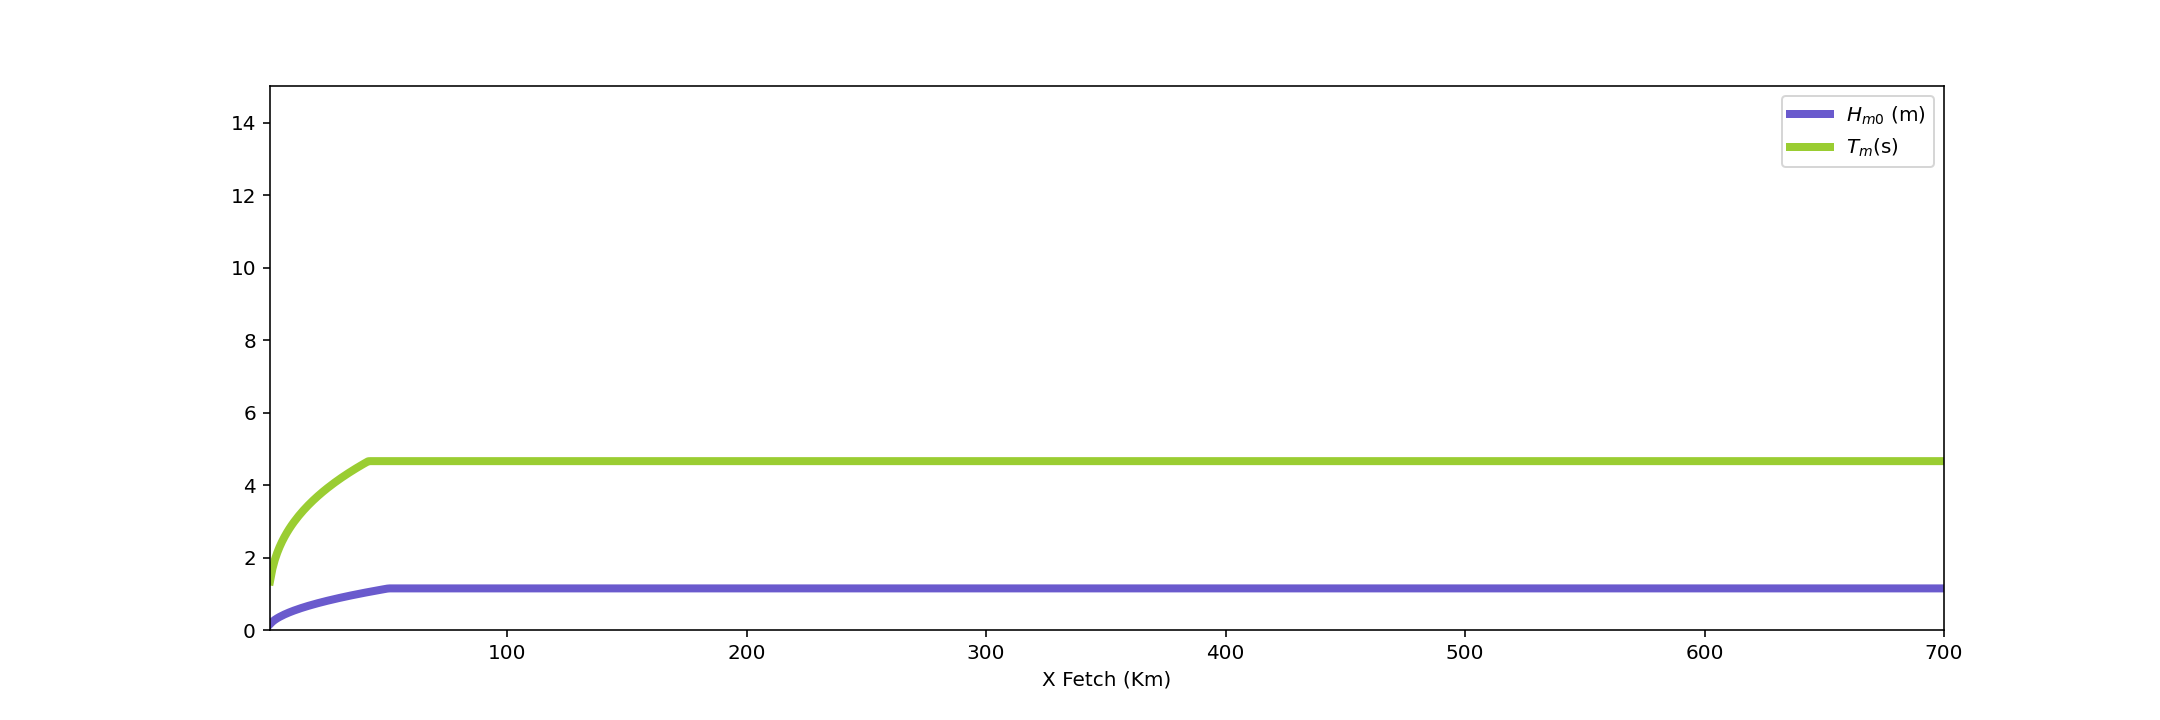

In [6]:
panel = pn.Column(
    '**Nomogram of deepwater significant wave prediction curves as functions of windspeed, fetch length and wind duration **',
    pn.Column(
        i[0][0],i[0][1],
    ),
    pn.Row(i[1]),
)
panel